### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
uber_data = pd.read_csv('./data/uber-raw-data-aug14.csv')
uber_data.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [3]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829275 entries, 0 to 829274
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  829275 non-null  object 
 1   Lat        829275 non-null  float64
 2   Lon        829275 non-null  float64
 3   Base       829275 non-null  object 
dtypes: float64(2), object(2)
memory usage: 25.3+ MB


#### Q1. On what Date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [4]:
# Convert the 'Date/Time' column to Datetime format
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'])
# Function for Expanding DateTime to separate columns that can be used for other data
def expand_Date(df):    
    df['Date'] = df['Date/Time'].dt.date
    df['Year'] = df['Date/Time'].dt.year
    df['Month'] = df['Date/Time'].dt.month
    df['Day'] = df['Date/Time'].dt.day
    df['Week'] = df['Date/Time'].dt.isocalendar().week
    df['DayOfWeek'] = df['Date/Time'].dt.day_name()
    return df
expand_Date(uber_data)
# print(uber_data.head())
# Group by Date and count the number of pickups
df1=uber_data
df1= df1.groupby(df1['Date/Time'].dt.date).size().reset_index(name='Count')
df1.columns = ['Date','Total_Rides']

m=max(df1['Total_Rides'])
for i in df1.iterrows():
    if i[1]['Total_Rides']==m:
        # print(i[1])
        break
print()
print("Date we see the most number of Uber pickups is : ", (i[1]['Date']))


Date we see the most number of Uber pickups is :  2014-08-07


#### Q.2 How many Uber pickups were made on the Date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [5]:
# Filter the DataFrame to include only the rows for the Date with the highest number of pickups
# Date we see the most number of Uber pickups is :  2014-08-07
uber_data['Date'] = pd.to_datetime(uber_data['Date'], format='%Y-%m-%d')
df=uber_data
df=df.loc[(df['Date']=='2014-08-07')]
# Get the count of pickups on the highest Date
print("The count of pickups on the highest Date : ", df['Date'].count())

The count of pickups on the highest Date :  32759


#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [6]:
# Count the number of unique TLC base companies
B=pd.unique(uber_data['Base'])
print("The number of unique TLC base companies : ", len(B) )
# print(uber_data.nunique(axis=0))---->Every column unique values.

The number of unique TLC base companies :  5


#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [7]:
# Group by TLC base company and count the number of pickups
df=uber_data
result_df = df.groupby('Base')['Date'].value_counts().reset_index(name='count').groupby('Base')['count'].sum().reset_index()

# Find the TLC base company with the highest number of pickups
result_df=result_df.loc[result_df['count'].idxmax()]
print("TLC base company with the highest number of pickups : ", result_df['Base'])

TLC base company with the highest number of pickups :  B02617


#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [8]:
# Group by TLC base company and count the number of pickups
df=uber_data
result_df = df.groupby('Base')['Date'].value_counts().reset_index(name='pickups').groupby('Base')['pickups'].sum().reset_index()
print(result_df)

     Base  pickups
0  B02512    31472
1  B02598   220129
2  B02617   355803
3  B02682   173280
4  B02764    48591


#### Q.6 Can you determine the busiest time of day for Uber pickups based on the Date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [14]:
# Extract the hour from the 'Date/Time' column
df=uber_data
df['Hour'] = df['Date/Time'].dt.hour
# Group by hour and count the number of pickups
result_df = df.groupby('Hour')['Date'].value_counts().reset_index(name='pickups').groupby('Hour')['pickups'].sum().reset_index()
# Find the hour with the highest number of pickups
result_df=result_df.loc[result_df['pickups'].idxmax()]
print("The hour with the highest number of pickups : ", result_df['Hour'])

The hour with the highest number of pickups :  17


#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function 

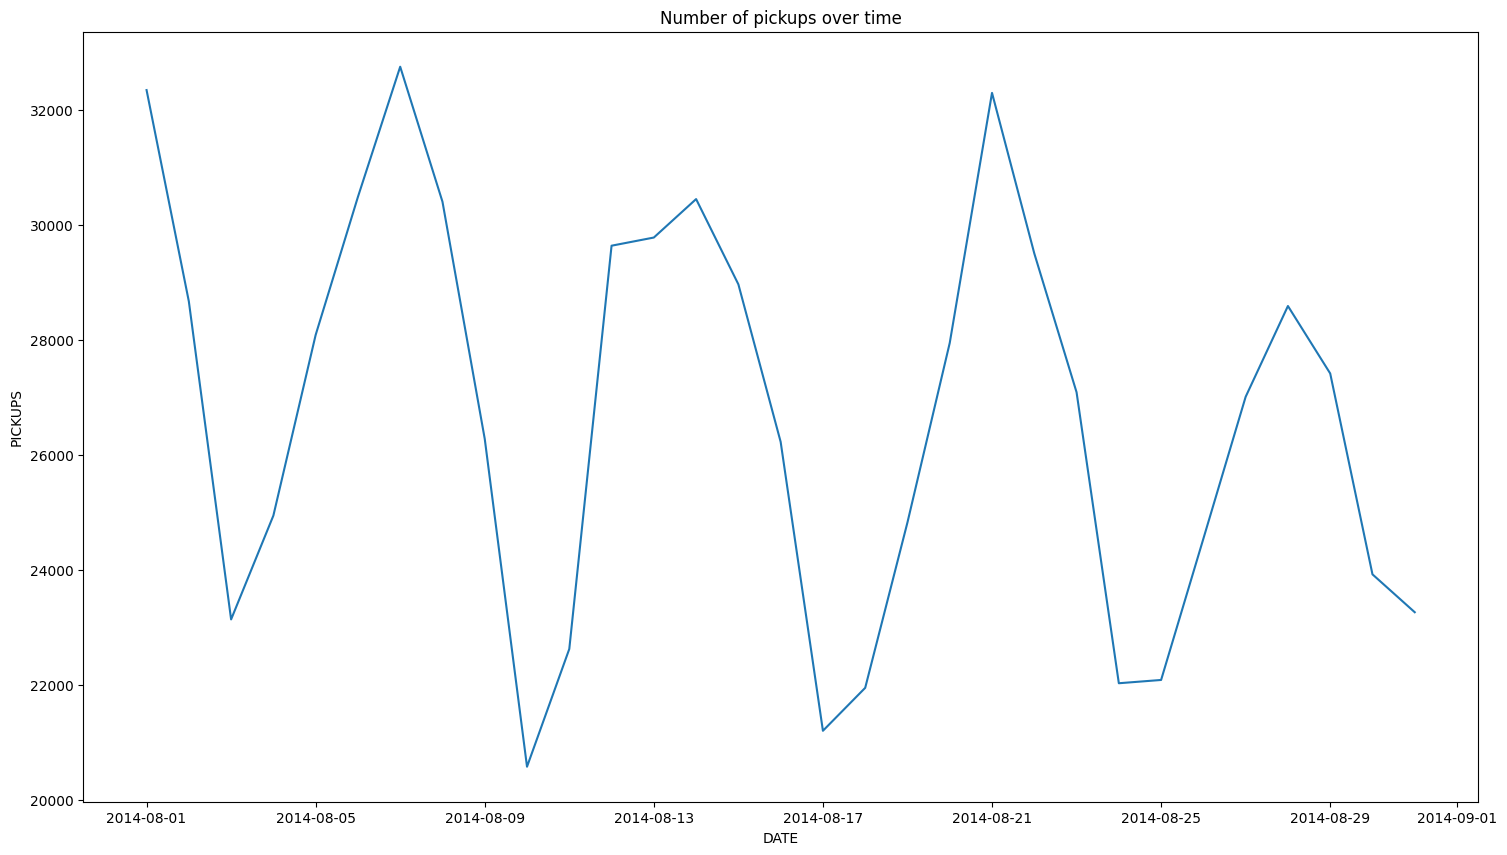

In [20]:
# Group by Date and count the number of pickups
df=uber_data
result_df = df.groupby('Date').size().reset_index(name='pickups')

# Create a line plot to visualize the number of pickups over time
plt.figure(figsize=(18,10))
plt.title("Number of pickups over time")
plt.xlabel("DATE")
plt.ylabel("PICKUPS")
plt.plot(result_df['Date'],result_df['pickups'])
plt.show;
# result_df.plot(kind='bar', figsize=(20,10))

#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

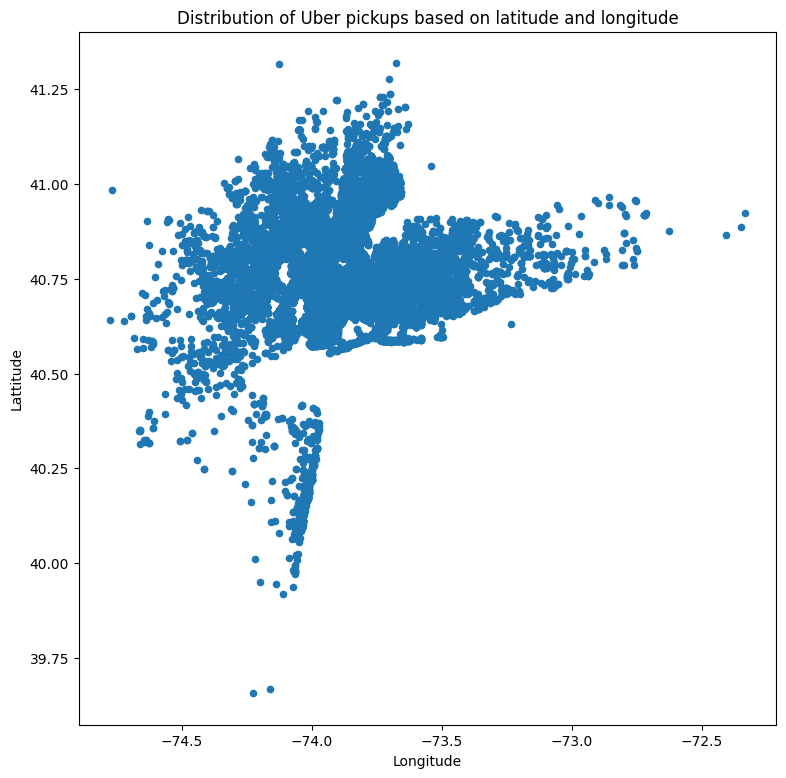

In [19]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
df=uber_data
df.plot(kind='scatter', x='Lon', y='Lat',figsize=(9,9),alpha=1)
plt.title("Distribution of Uber pickups based on latitude and longitude")
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.show()

#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

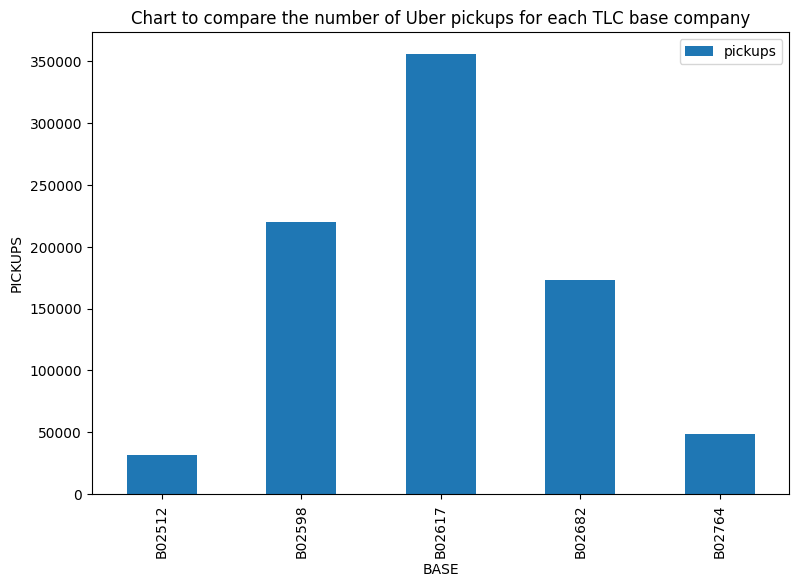

In [18]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
df=uber_data
result_df = df.groupby('Base')['Date'].value_counts().reset_index(name='pickups').groupby('Base')['pickups'].sum().reset_index()
result_df.plot(kind='bar', x='Base',y='pickups',figsize=(9,6))
plt.title("Chart to compare the number of Uber pickups for each TLC base company")
plt.xlabel("BASE")
plt.ylabel("PICKUPS")
plt.show;

#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

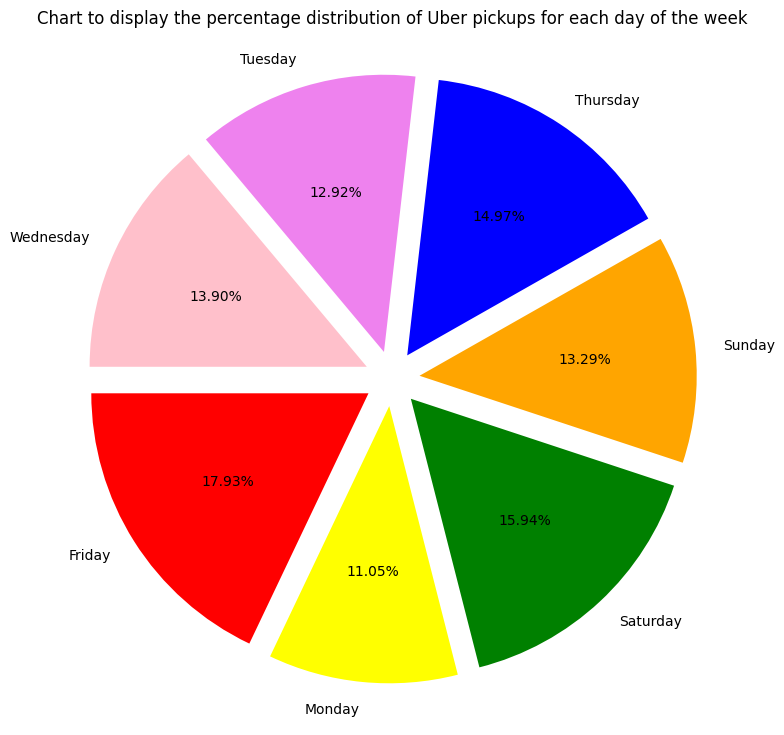

In [17]:
# Group by day of the week and count the number of pickups
import calendar
df=uber_data
df=df.groupby('DayOfWeek').size().reset_index(name="pickups")
# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
plt.figure(figsize=(9,9))
labels=df['DayOfWeek']
sizes=df['pickups']
colors = ['red', 'yellow', 'green', 'orange', 'blue', 'violet', 'pink']  # Colors for each label
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
plt.pie(sizes, labels= labels, colors=colors, explode=explode, autopct='%1.2f%%', startangle=180)
plt.title("Chart to display the percentage distribution of Uber pickups for each day of the week")
plt.show()